In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Cassava dataset distribution

In [2]:
df_image_labels = pd.read_csv("image_labels.csv")

In [3]:
df_image_labels.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [4]:
df_value_counts = df_image_labels.label.value_counts(sort=False)

In [5]:
dict_class_mapping = {
    0 : "CBB",
    1 : "CBSD",
    2 : "CGM",
    3 : "CMD",
    4 : "Healthy"
}

c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


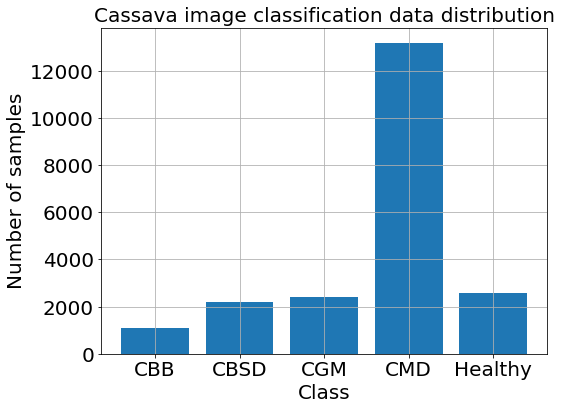

In [6]:
fig = plt.figure(figsize=(8, 6))
plt.bar(df_value_counts.index.to_numpy(), df_value_counts.to_numpy())
plt.grid()
plt.xticks(df_value_counts.index.to_numpy(), np.array(list(dict_class_mapping.values())), fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Class", fontsize=20)
plt.ylabel("Number of samples", fontsize=20)
plt.title("Cassava image classification data distribution", fontsize=20)
fig.show()

In [7]:
df_image_labels.shape

(21397, 2)

In [8]:
print(df_value_counts)

0     1087
1     2189
2     2386
3    13158
4     2577
Name: label, dtype: int64


## Train metrics with pretrained ResNet-34

In [9]:
csv_train = "model_pretrained/train_metrics.csv"

In [10]:
df_train = pd.read_csv(csv_train)

In [11]:
df_train.head()

,epoch,loss_train,loss_valid,accuracy_train,accuracy_valid
0,1,0.622871,0.460008,77.805907,83.703271
1,2,0.403331,0.468294,86.140863,84.404206
2,3,0.344863,0.468397,88.146706,84.170561
3,4,0.290073,0.502358,90.022720,83.352804
4,5,0.255571,0.559690,91.489776,82.535047


c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


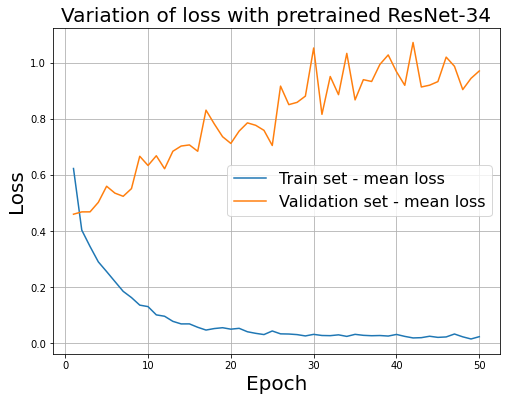

In [12]:
fig = plt.figure(figsize=(8, 6))
plt.plot(df_train.epoch, df_train.loss_train, "-", label="Train set - mean loss")
plt.plot(df_train.epoch, df_train.loss_valid, "-", label="Validation set - mean loss")
plt.ylabel("Loss", fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.title("Variation of loss with pretrained ResNet-34", fontsize=20)
plt.legend(fontsize=16)
plt.grid()
fig.show()

c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


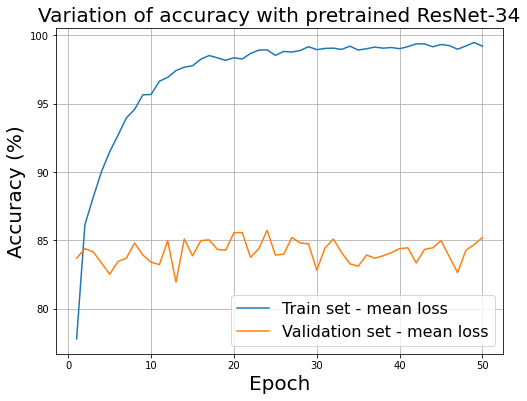

In [13]:
fig = plt.figure(figsize=(8, 6))
plt.plot(df_train.epoch, df_train.accuracy_train, "-", label="Train set - mean loss")
plt.plot(df_train.epoch, df_train.accuracy_valid, "-", label="Validation set - mean loss")
plt.ylabel("Accuracy (%)", fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.title("Variation of accuracy with pretrained ResNet-34", fontsize=20)
plt.legend(fontsize=16)
plt.grid()
fig.show()